In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Tue May 14 23:06:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install keras

In [ ]:
!pip install keras.utils

In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=a5771bf88bcfe517887d16ad858e82689ab2df9987c463d9eaeed1bf0903445e
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
from keras.utils.np

ImportError: cannot import name 'np_utils' from 'keras.utils' (/usr/local/lib/python3.10/dist-packages/keras/utils/__init__.py)

In [2]:

import pandas as pd
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from tensorflow.keras import *
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
#from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from plotly import graph_objs as go
from sklearn.metrics import classification_report
import random
import numpy as np
import seaborn as sns
import tensorflow as tf


In [3]:
import gzip
import json
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield json.loads(l)

# Example usage
file_path = '/content/drive/MyDrive/BertReviewAnalysis/review-Kansas_10.json.gz'

# Initialize an empty list to store the JSON objects
json_objects = []

# Iterate through the JSON objects and append them to the list
for json_obj in parse(file_path):
    json_objects.append(json_obj)

# Convert the list of JSON objects to a DataFrame
df = pd.DataFrame(json_objects)

# Now 'df' contains all JSON objects in a DataFrame

In [4]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,110174851715143039572,Hannah Johnston,1603469475914,4,Really cute store. All the staff are lovely. T...,None,None,0x87bf03987b89d0c3:0x9b3d137e7bfc045a
1,109469133033675413034,Flint Blankenship,1628280826510,4,Well...... The place is a 5-Star..... BUT..,None,None,0x87bf03987b89d0c3:0x9b3d137e7bfc045a
2,101132804334372412402,Sheryl Fields,1511648800146,2,Normally we really like stopping in and shoppi...,None,"{'time': 1511695775965, 'text': 'So sorry to d...",0x87bf03987b89d0c3:0x9b3d137e7bfc045a
3,114573410811170173535,Robert Gragg,1572660533736,4,Nice selection of antiques collectables and ho...,None,"{'time': 1572693100906, 'text': 'Thank you for...",0x87bf03987b89d0c3:0x9b3d137e7bfc045a
4,117268927797389286107,Jan Swan,1603471293093,4,Nice stuff,None,None,0x87bf03987b89d0c3:0x9b3d137e7bfc045a


In [5]:
df.shape

(3080115, 8)

In [6]:
df = df[['user_id', 'text', 'rating']]

In [7]:
df, remaining = train_test_split(df, random_state = 42, train_size = 0.3, stratify = df["rating"])  #using only 0.75% of the original data

In [8]:
df.shape

(924034, 3)

In [9]:
df.rating.value_counts()

rating
5    529302
4    220490
3    100773
1     40189
2     33280
Name: count, dtype: int64

In [10]:
def to_sentiment(rating):
  rating = int(rating)
  if rating <=2:
    return 0
  elif rating == 3:
    return 1
  else:
    return 2

In [11]:
df['sentiment'] = df.rating.apply(to_sentiment)

In [12]:
df.shape

(924034, 4)

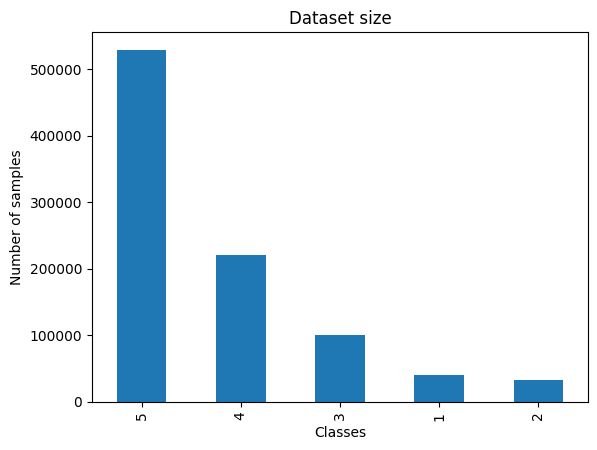

In [13]:

df.rating.value_counts().plot.bar()
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.title('Dataset size')
plt.show()

In [14]:
# Check for missing values in the 'text' column
missing_values = df['text'].isnull().sum()

if missing_values > 0:
    # If there are missing values, you can choose to drop those rows or fill them with appropriate values
    # For example, you can drop rows with missing values:
    df.dropna(subset=['text'], inplace=True)
    print(f"Dropped {missing_values} rows with missing 'text' values.")

# Verify column names
if 'text' in df.columns:
    # Join text data based on rating
    text_by_rating = {}
    for rating in range(1, 6):
        text_by_rating[rating] = ' '.join(df[df['rating'] == rating]['text'])

    # Print a sample of joined text data for each rating
    for rating, text in text_by_rating.items():
        print(f"Text for rating {rating}:\n{text[:100]}...")  # Print the first 100 characters for each rating
else:
    print("The 'text' column does not exist in the DataFrame.")

Dropped 437343 rows with missing 'text' values.
Text for rating 1:
Another FAIL. Always messing up my order. Slower then normal service. Staff stood around a while the...
Text for rating 2:
One of the slowest fast food restaurants I have ever been to. It consistently takes over 10 mins to ...
Text for rating 3:
I went to school here in the 90s when it was Cherokee Elementary. Sad because they are closing this ...
Text for rating 4:
Extremely fast service. Meal was great! Decent food for the price. Glad this exists, but they really...
Text for rating 5:
Fast friendly service with great food. Absolutely amazing food absolutely worth it . I used to go to...


In [15]:
df.head()

,user_id,text,rating,sentiment
619168,115234133247617433757,Extremely fast service. Meal was great!,4,2
3044953,100510469343202004867,Fast friendly service with great food.,5,2
184969,108411851823056113630,Absolutely amazing food absolutely worth it . ...,5,2
445029,106105783922758017696,"I love the Family EyeCare Center, they are fr...",5,2
317114,104375254911798683318,"Dr. Warwick is absolutely wonderful, as well a...",5,2


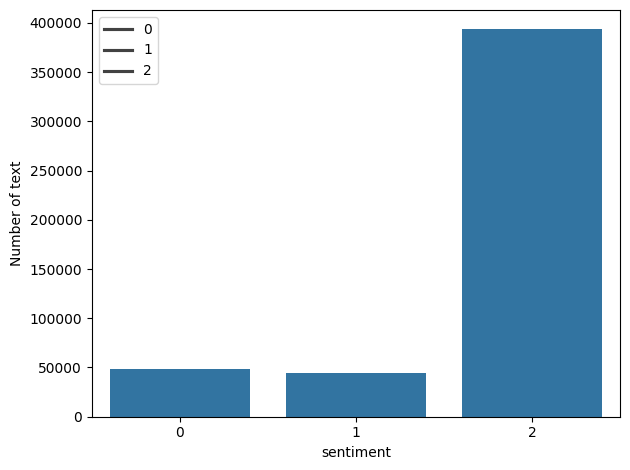

In [16]:
diff_of_gen = df.groupby(df['sentiment'])['text'].count().reset_index()

sns.barplot(x=diff_of_gen['sentiment'],y=diff_of_gen['text'])
plt.tight_layout()
plt.legend(diff_of_gen['sentiment'])
plt.ylabel('Number of text')
plt.show()

In [17]:
train, remain = train_test_split(df, test_size=0.2, random_state=0)
validation, test = train_test_split(remain, test_size=0.5, random_state=0)

print(f'The size of training dataset is: {len(train)} samples')
print(f'The size of validation dataset is: {len(validation)} samples')
print(f'The size of test dataset is: {len(test)} samples')

The size of training dataset is: 389352 samples
The size of validation dataset is: 48669 samples
The size of test dataset is: 48670 samples


In [18]:
encoder = LabelEncoder()
encoder.fit(df.sentiment.values)

train_Y = encoder.transform(train.sentiment.values)
valid_Y = encoder.transform(validation.sentiment.values)
test_Y = encoder.transform(test.sentiment.values)

In [22]:

train_X = train.text.values
valid_X = validation.text.values
test_X = test.text.values

In [29]:
train_Y.shape

(389352,)

In [27]:
# Convert to one-hot encoded format
one_hot_y = np.zeros((train_Y.size, train_Y.max()+1))
one_hot_y[np.arange(train_Y.size), train_Y.flatten()] = 1

print(one_hot_y.shape)  # Shape of the one-hot encoded matrix
print(one_hot_y)         # One-hot encoded matrix

(389352, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [30]:
encoder = LabelEncoder()
encoder.fit(df.sentiment.values)

encoded_train_Y = encoder.transform(train.sentiment.values)
encoded_valid_Y = encoder.transform(validation.sentiment.values)
encoded_test_Y = encoder.transform(test.sentiment.values)

train_X = train.text.values
valid_X = validation.text.values
test_X = test.text.values

#train_Y = to_categorical(encoded_train_Y)
#valid_Y = to_categorical(encoded_valid_Y)
#test_Y = to_categorical(encoded_test_Y)

# Convert to one-hot encoded format
train_Y = np.zeros((encoded_train_Y.size, encoded_train_Y.max()+1))
train_Y[np.arange(encoded_train_Y.size), encoded_train_Y.flatten()] = 1

# Convert to one-hot encoded format
valid_Y = np.zeros((encoded_valid_Y.size, encoded_valid_Y.max()+1))
valid_Y[np.arange(encoded_valid_Y.size), encoded_valid_Y.flatten()] = 1

# Convert to one-hot encoded format
test_Y = np.zeros((encoded_test_Y.size, encoded_test_Y.max()+1))
test_Y[np.arange(encoded_test_Y.size), encoded_test_Y.flatten()] = 1

In [31]:
SEQ_LEN = 360
VOCAB_SIZE = 100000
EPOCHS = 10
BATCH_SIZE = 32
OOV_TOKEN = ''


tokens = preprocessing.text.Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokens.fit_on_texts(list(train_X))

train_X = tokens.texts_to_sequences(train_X)
valid_X = tokens.texts_to_sequences(valid_X)
test_X = tokens.texts_to_sequences(test_X)

print(np.quantile([len(x) for x in train_X], 0.95))

train_X = preprocessing.sequence.pad_sequences(train_X, maxlen=SEQ_LEN, padding='post', truncating='post')
valid_X = preprocessing.sequence.pad_sequences(valid_X, maxlen=SEQ_LEN, padding='post', truncating='post')
test_X = preprocessing.sequence.pad_sequences(test_X, maxlen=SEQ_LEN, padding='post', truncating='post')

68.0


# LSTM MODEL

In [32]:
inputs = Input(shape=(None,), dtype="int32")

x = layers.Embedding(VOCAB_SIZE, 128)(inputs)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)

outputs = layers.Dense(3, activation="softmax")(x)

model = Model(inputs, outputs)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'],)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         12800000  
                                                                 
 bidirectional_2 (Bidirecti  (None, None, 128)         98816     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 12998019 (49.58 MB)
Trainable params: 1299801

In [33]:
my_callbacks = [callbacks.ModelCheckpoint('lstm.h5', monitor='val_loss', save_best_only=True, verbose=2),
                callbacks.EarlyStopping(monitor='val_loss',  patience=5, verbose=2),
                callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=2)]

lstm = model.fit(train_X,
                train_Y,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                validation_data=(valid_X, valid_Y),
                callbacks = my_callbacks,
                verbose=1)

Epoch 1/10
12168/12168 [==============================] - ETA: 0s - loss: 0.2225 - accuracy: 0.8614
Epoch 1: val_loss improved from inf to 0.20033, saving model to lstm.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12168/12168 [==============================] - 703s 57ms/step - loss: 0.2225 - accuracy: 0.8614 - val_loss: 0.2003 - val_accuracy: 0.8746 - lr: 1.0000e-04
Epoch 2/10
12168/12168 [==============================] - ETA: 0s - loss: 0.1898 - accuracy: 0.8806
Epoch 2: val_loss improved from 0.20033 to 0.19262, saving model to lstm.h5
12168/12168 [==============================] - 660s 54ms/step - loss: 0.1898 - accuracy: 0.8806 - val_loss: 0.1926 - val_accuracy: 0.8787 - lr: 1.0000e-04
Epoch 3/10
12168/12168 [==============================] - ETA: 0s - loss: 0.1801 - accuracy: 0.8870
Epoch 3: val_loss improved from 0.19262 to 0.19181, saving model to lstm.h5
12168/12168 [==============================] - 653s 54ms/step - loss: 0.1801 - accuracy: 0.8870 - val_loss: 0.1918 - val_accuracy: 0.8799 - lr: 1.0000e-04
Epoch 4/10
12168/12168 [==============================] - ETA: 0s - loss: 0.1723 - accuracy: 0.8930
Epoch 4: val_loss improved from 0.19181 to 0.19074, saving model to lstm.h5
12168/1

In [35]:


loss, accuracy = model.evaluate(test_X, test_Y)

pred_Y = model.predict(test_X)
pred_Y = np.argmax(pred_Y, axis=1)

true_Y = np.argmax(test_Y, axis=1)
CLASSES =['negative','neutral','positive']
#CLASSES = list(encoder.classes_)
print(classification_report(true_Y, pred_Y, target_names=CLASSES))

1521/1521 [==============================] - 32s 20ms/step
              precision    recall  f1-score   support

    negative       0.73      0.69      0.71      4891
     neutral       0.41      0.38      0.39      4430
    positive       0.94      0.95      0.94     39349

    accuracy                           0.87     48670
   macro avg       0.69      0.67      0.68     48670
weighted avg       0.87      0.87      0.87     48670



In [36]:
def visualize_confusion_matrix(accuracy, labels, val_pred_labels, val_true_labels):
    '''
    Plots the confusion matrix for given data.
    '''
    confusion_matrix = np.zeros((3, 3), dtype=np.int16)
    for pred, true in zip(val_pred_labels, val_true_labels):
        confusion_matrix[pred, true] += 1
    confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1,keepdims=1)

    plt.figure(figsize=(20, 20))
    sns.set(font_scale=1.5)
    ax = sns.heatmap(confusion_matrix, annot=True, square=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
    ax.set_title(f'Confusion Matrix (Accuracy = {accuracy})', fontsize=50)
    ax.set_xticklabels(labels, fontsize=15)
    ax.set_yticklabels(labels, fontsize=15)
    ax.set_xlabel("True Label", fontsize=25)
    ax.set_ylabel("Predicted Label", fontsize=25)
    plt.show()


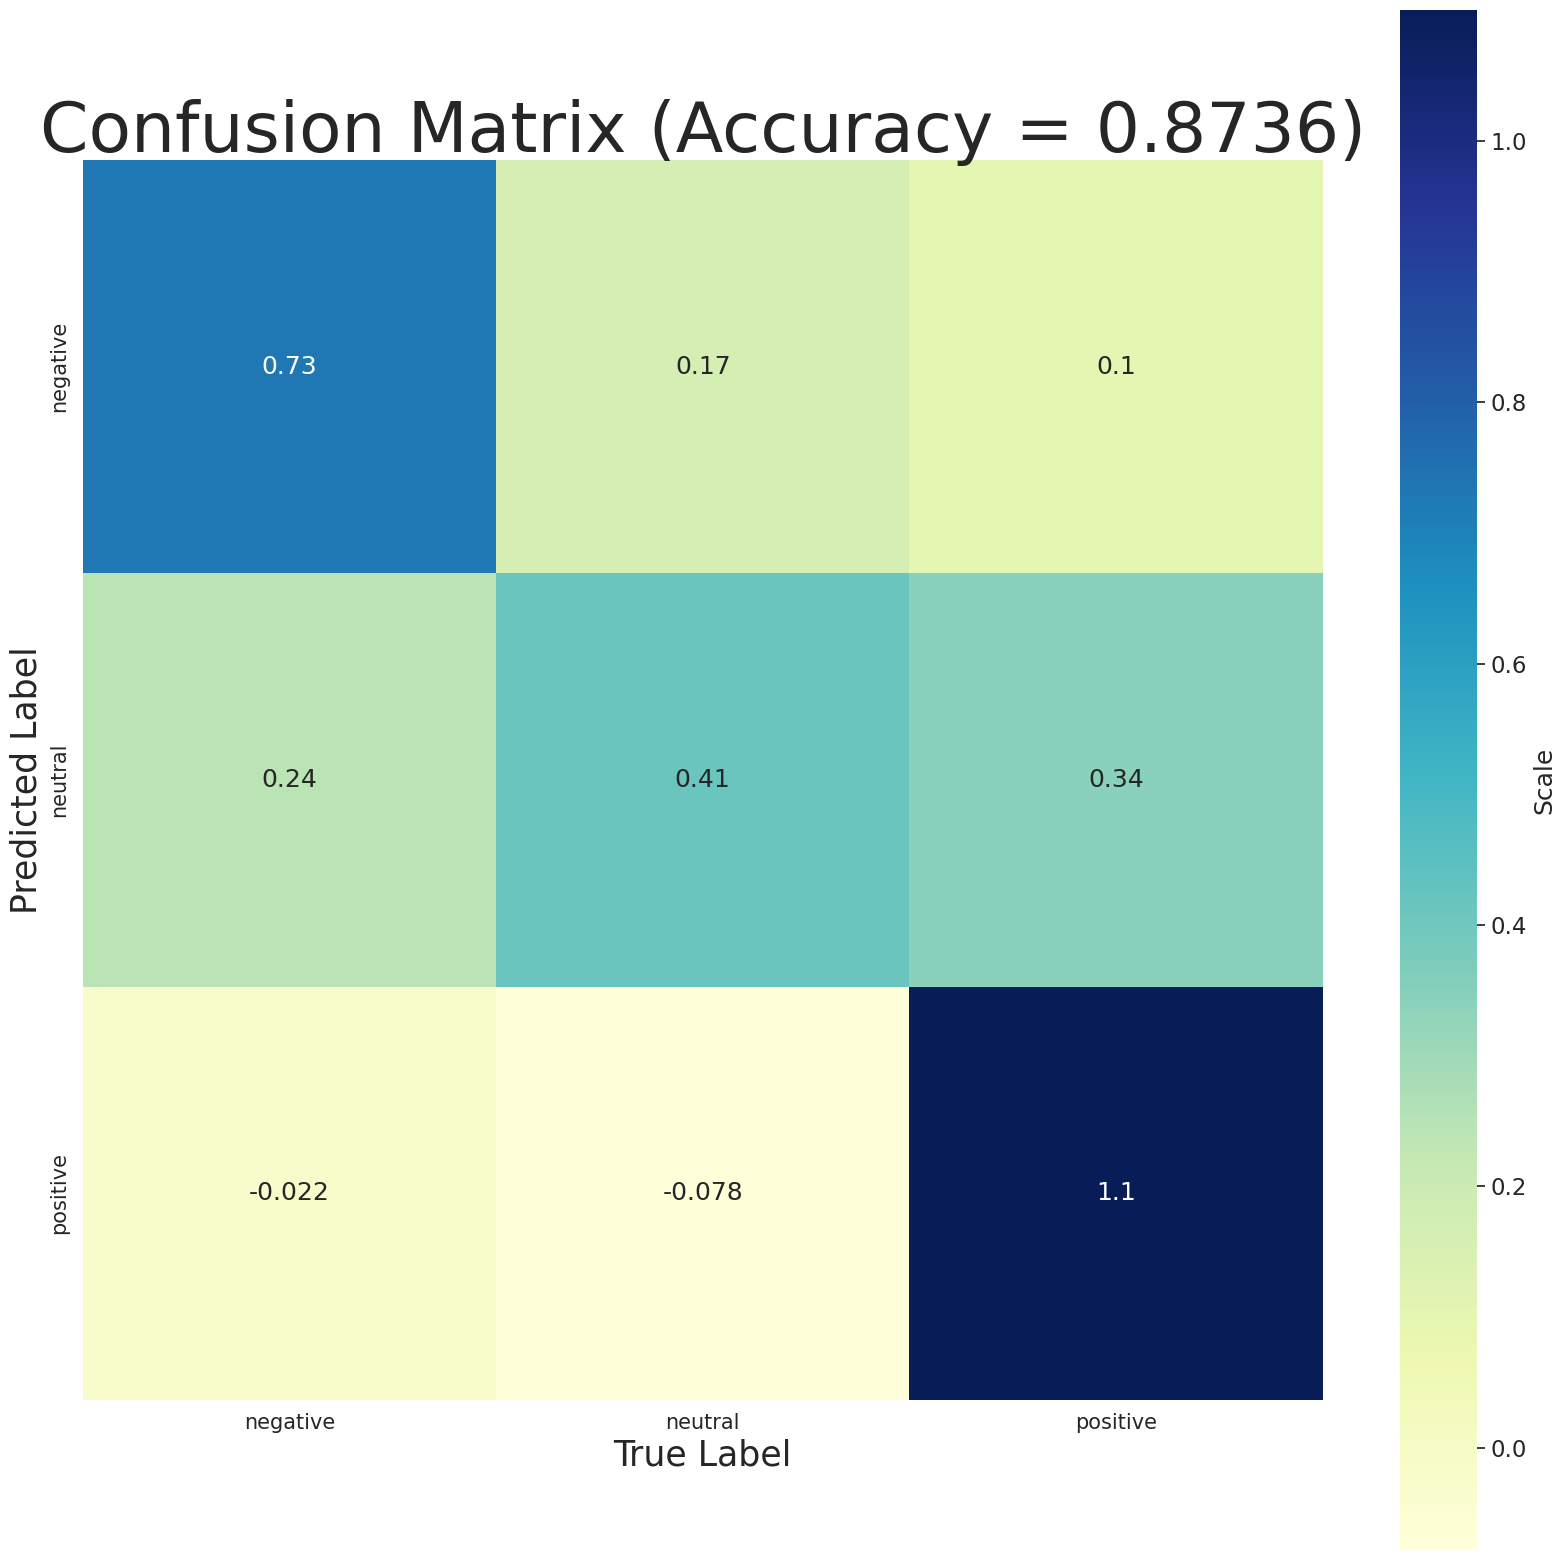

In [37]:

visualize_confusion_matrix(round(accuracy, 4), CLASSES, pred_Y, true_Y)

# CNN MODEL

In [38]:
inputs = Input(shape=(SEQ_LEN,), dtype="int32")

x = layers.Embedding(VOCAB_SIZE, 128)(inputs)
x = layers.Conv1D(32, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling1D()(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)

outputs = layers.Dense(3, activation="softmax")(x)

model = Model(inputs, outputs)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'],)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 360)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 360, 128)          12800000  
                                                                 
 conv1d (Conv1D)             (None, 360, 32)           12320     
                                                                 
 max_pooling1d (MaxPooling1  (None, 180, 32)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5760)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               737408    
                                                           

In [39]:

my_callbacks = [callbacks.ModelCheckpoint('cnn.h5', monitor='val_loss', save_best_only=True, verbose=2),
                callbacks.EarlyStopping(monitor='val_loss',  patience=5, verbose=2),
                callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=2)]

cnn = model.fit(train_X,
                train_Y,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                validation_data=(valid_X, valid_Y),
                callbacks = my_callbacks,
                verbose=1)

Epoch 1/10
12168/12168 [==============================] - ETA: 0s - loss: 0.1990 - accuracy: 0.8767
Epoch 1: val_loss improved from inf to 0.18453, saving model to cnn.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12168/12168 [==============================] - 159s 13ms/step - loss: 0.1990 - accuracy: 0.8767 - val_loss: 0.1845 - val_accuracy: 0.8835 - lr: 0.0010
Epoch 2/10
12168/12168 [==============================] - ETA: 0s - loss: 0.1691 - accuracy: 0.8950
Epoch 2: val_loss did not improve from 0.18453
12168/12168 [==============================] - 96s 8ms/step - loss: 0.1691 - accuracy: 0.8950 - val_loss: 0.1860 - val_accuracy: 0.8863 - lr: 0.0010
Epoch 3/10
12168/12168 [==============================] - ETA: 0s - loss: 0.1489 - accuracy: 0.9089
Epoch 3: val_loss did not improve from 0.18453

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
12168/12168 [==============================] - 96s 8ms/step - loss: 0.1489 - accuracy: 0.9089 - val_loss: 0.2070 - val_accuracy: 0.8836 - lr: 0.0010
Epoch 4/10
12162/12168 [============================>.] - ETA: 0s - loss: 0.1190 - accuracy: 0.9291
Epoch 4: val_loss did not improve from 0.18453
12168/12168 [====================

In [41]:

loss, accuracy = model.evaluate(test_X, test_Y)

pred_Y = model.predict(test_X)
pred_Y = np.argmax(pred_Y, axis=1)

true_Y = np.argmax(test_Y, axis=1)

CLASSES =['negative','neutral','positive']
print(classification_report(true_Y, pred_Y, target_names=CLASSES))

1521/1521 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

    negative       0.73      0.67      0.69      4891
     neutral       0.39      0.38      0.38      4430
    positive       0.93      0.95      0.94     39349

    accuracy                           0.87     48670
   macro avg       0.68      0.66      0.67     48670
weighted avg       0.86      0.87      0.87     48670



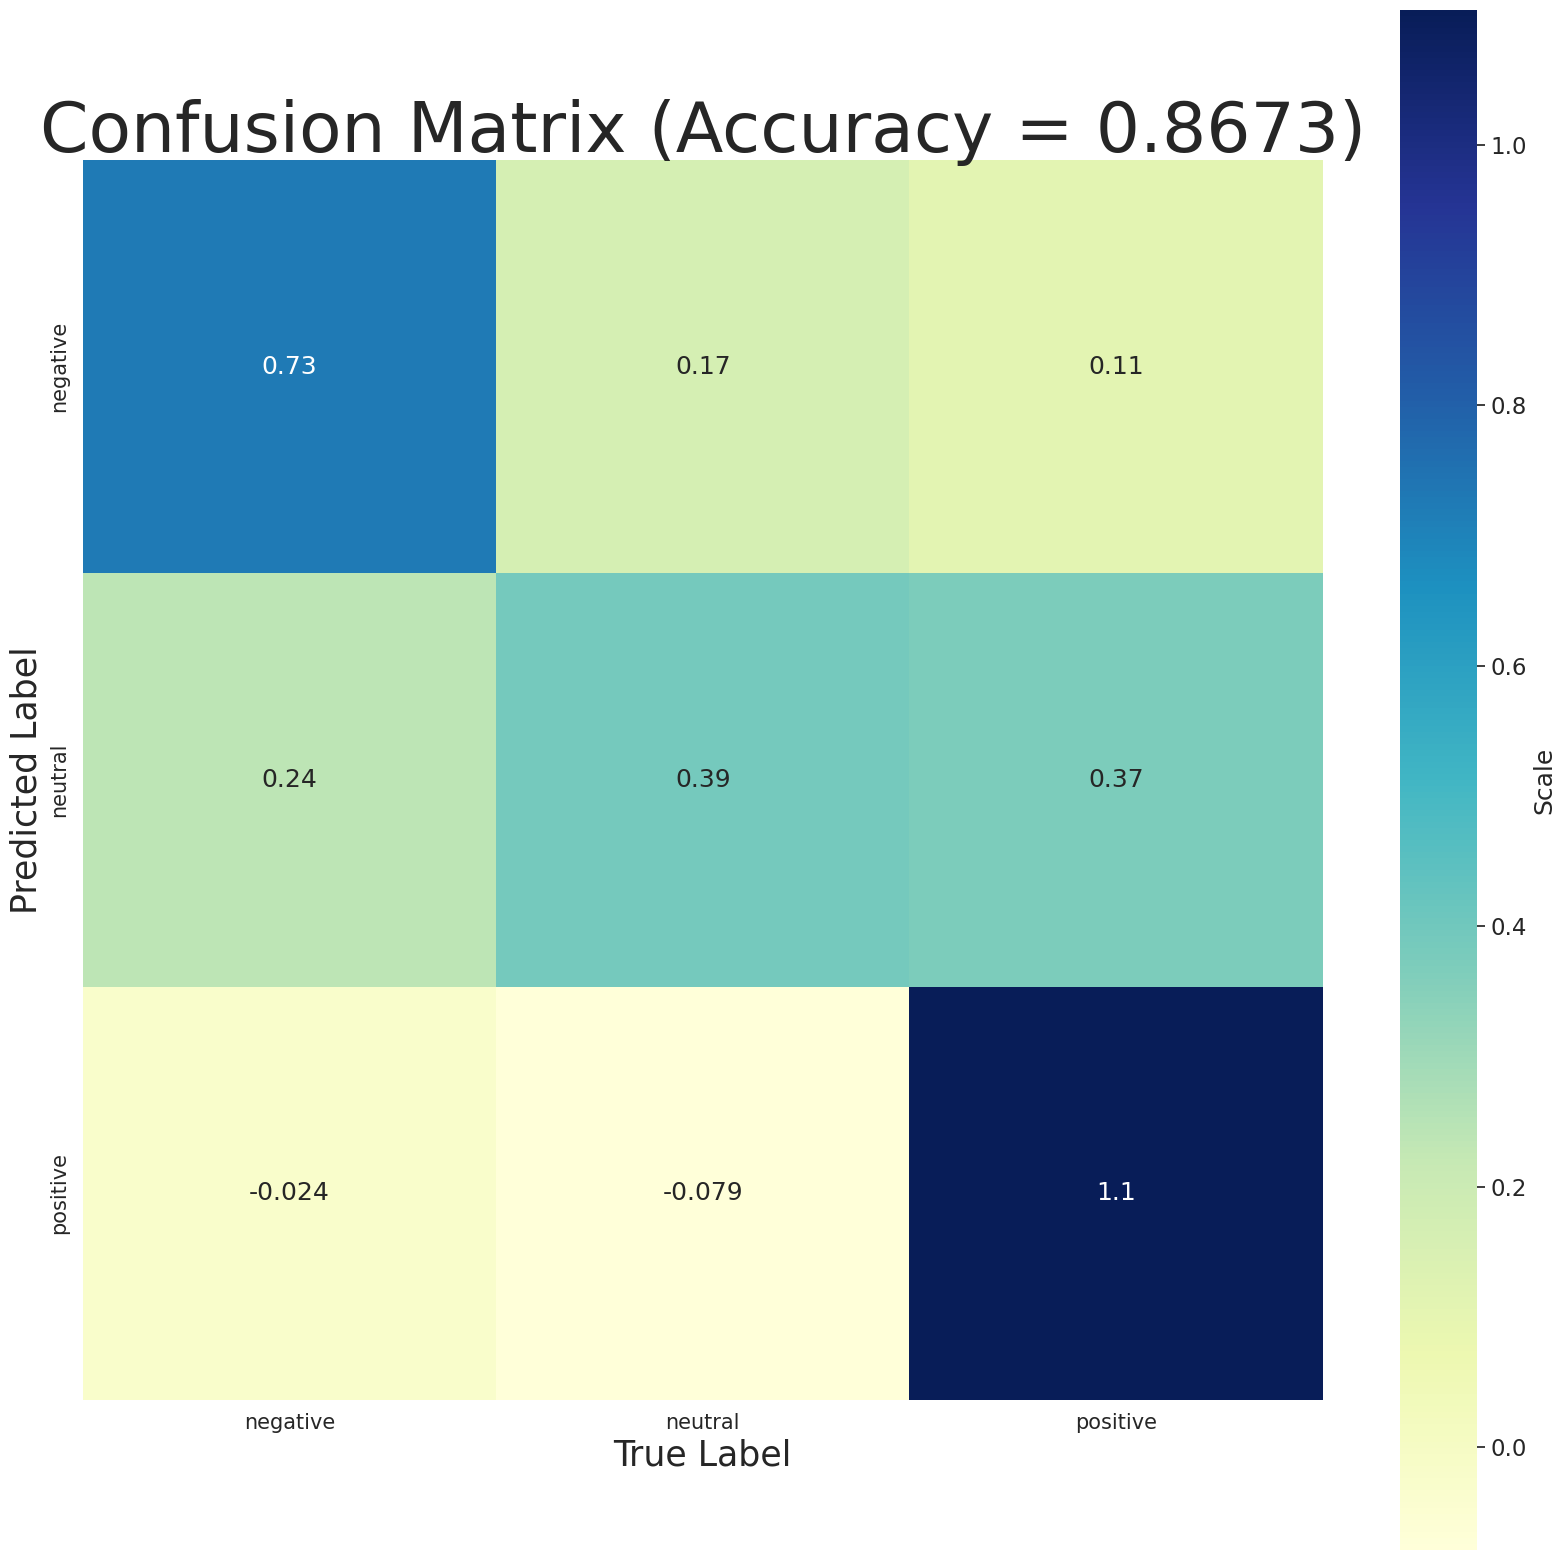

In [42]:

visualize_confusion_matrix(round(accuracy, 4), CLASSES, pred_Y, true_Y)

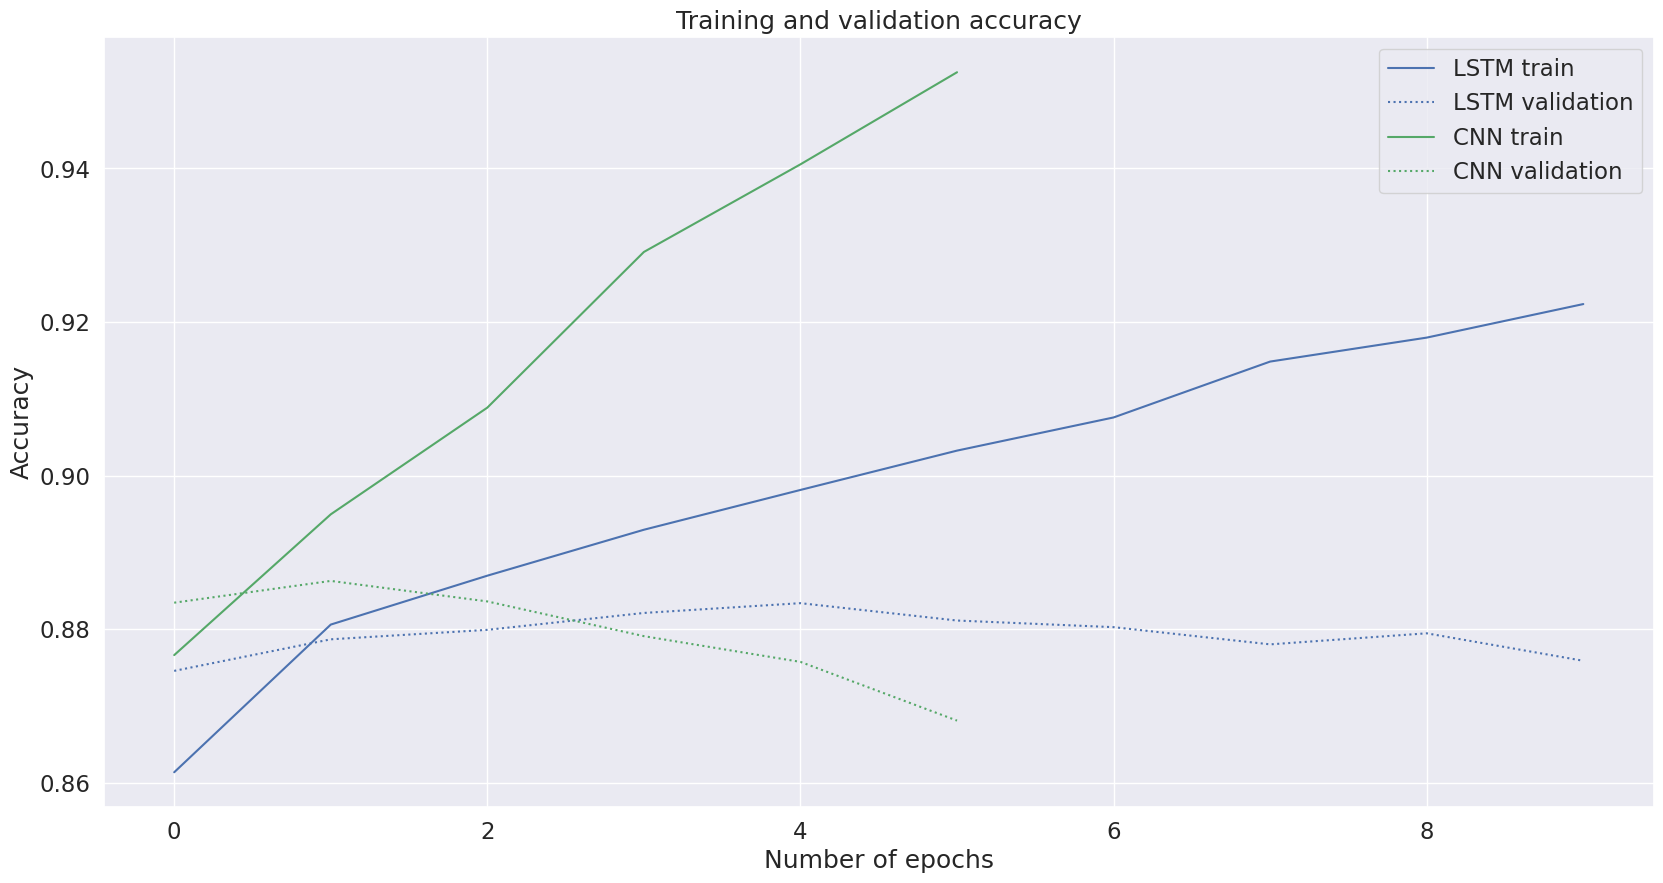

In [43]:


plt.figure(figsize=(20, 10))
plt.plot(lstm.history['accuracy'], label='LSTM train', linestyle='-', color='b')
plt.plot(lstm.history['val_accuracy'], label='LSTM validation', linestyle=':', color='b')
plt.plot(cnn.history['accuracy'], label='CNN train', linestyle='-', color='g')
plt.plot(cnn.history['val_accuracy'], label='CNN validation', linestyle=':', color='g')
plt.title('Training and validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


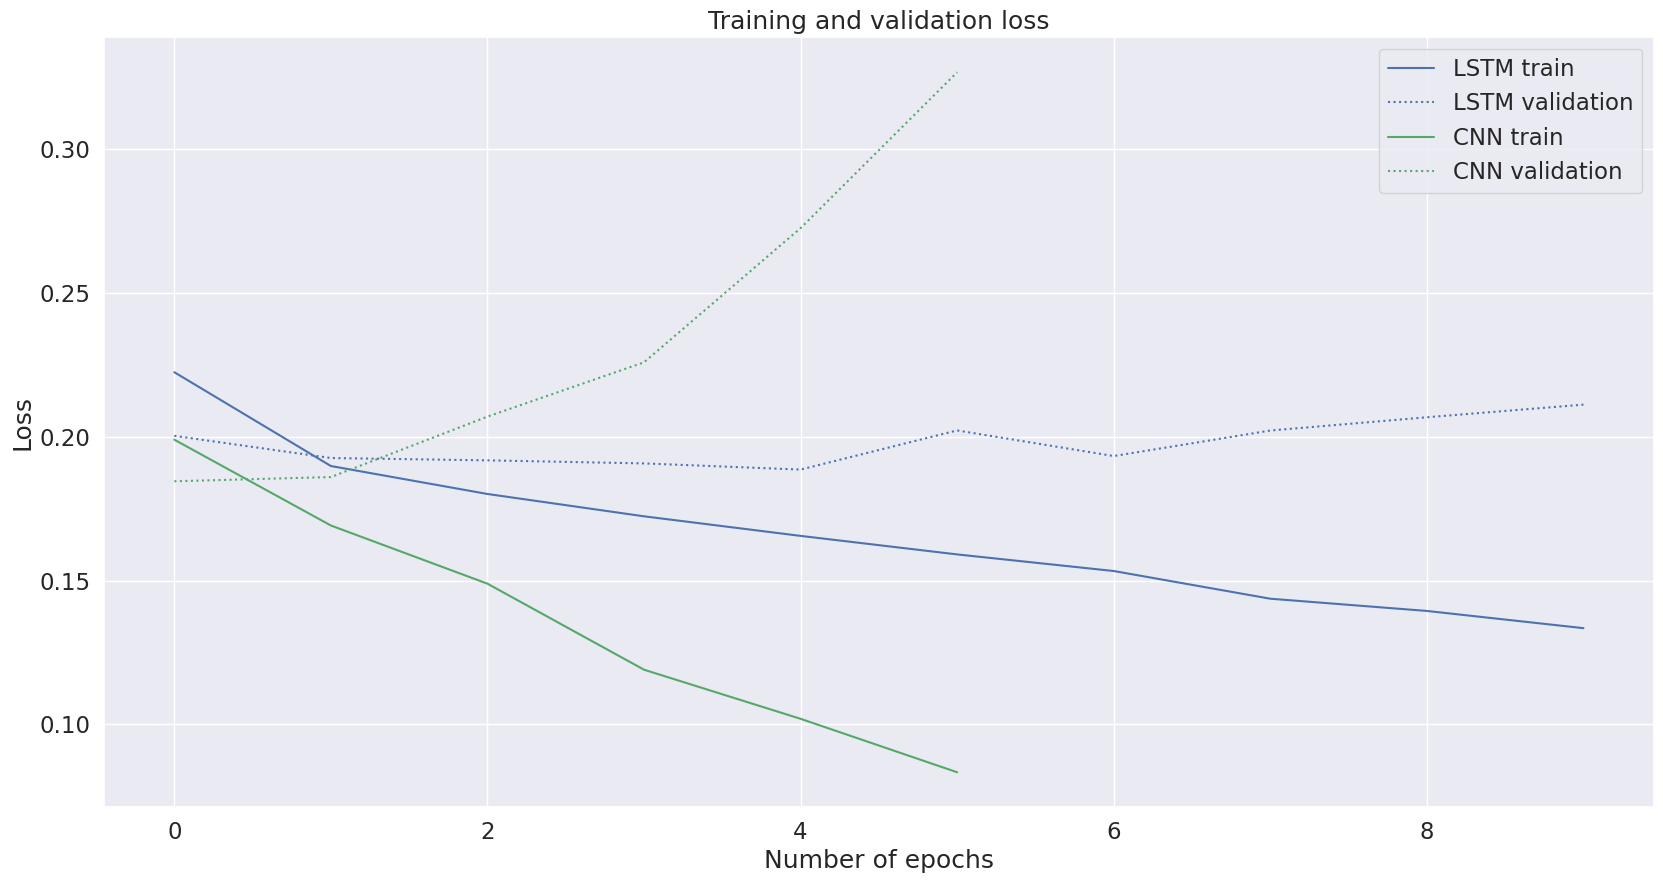

In [44]:

plt.figure(figsize=(20, 10))
plt.plot(lstm.history['loss'], label='LSTM train', linestyle='-', color='b')
plt.plot(lstm.history['val_loss'], label='LSTM validation', linestyle=':', color='b')
plt.plot(cnn.history['loss'], label='CNN train', linestyle='-', color='g')
plt.plot(cnn.history['val_loss'], label='CNN validation', linestyle=':', color='g')
plt.title('Training and validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()